In [1]:
import textblob


def sentimentAnalyzer(text):
    blob = textblob.TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity < -0.2:
        return "negative"
    elif polarity > 0.2:
        return "positive"
    else:
        return "neutral"


def verifyTest():
    assert sentimentAnalyzer("Happy") == "positive"
    assert sentimentAnalyzer("Exciting") == "positive"
    assert sentimentAnalyzer("good") == "positive"
    assert sentimentAnalyzer("rich") == "positive"
    assert sentimentAnalyzer("smile") == "positive"

    assert sentimentAnalyzer("Sad") == "negative"
    assert sentimentAnalyzer("disappointed") == "negative"
    assert sentimentAnalyzer("bad") == "negative"
    assert sentimentAnalyzer("poor") == "negative"
    assert sentimentAnalyzer("anger") == "negative"

    assert sentimentAnalyzer("food") == "neutral"
    assert sentimentAnalyzer("animal") == "neutral"

    print("All tests passed")


verifyTest()


All tests passed


In [2]:
# Import dataset using pandas
import pandas as pd

df = pd.read_csv("data.csv")

# Make new data frame with all reviews for one product
productDF = df[df["id"] == "AVqkIhwDv8e3D1O-lebb"]
productDF.head()

C:\Users\radwa\AppData\Local\Temp\ipykernel_7692\1284835530.py:4: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
# Drop all columns except id, name, category, and review text
productDF = productDF.drop(["categories", "asins", "keys", "manufacturer", "reviews.date", "reviews.dateAdded",
                            "reviews.dateSeen", "reviews.didPurchase", "reviews.doRecommend", "reviews.id",
                            "reviews.numHelpful", "reviews.sourceURLs",
                            "reviews.userCity", "reviews.userProvince", "reviews.username", "id"], axis=1)
productDF.head()

,name,brand,reviews.rating,reviews.text,reviews.title
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,This product so far has not disappointed. My c...,Kindle
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,great for beginner or experienced person. Boug...,very fast
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids


In [4]:
# Describe the data
print("Product Name: " + productDF["name"][0])
print("Number of columns: " + str(len(productDF.columns)))
print("Number of rows: " + str(len(productDF.index)))
print("Length of shortest review: " + str(len(min(productDF["reviews.text"], key=len))))
productDF.describe()


Product Name: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta
Number of columns: 5
Number of rows: 2814
Length of shortest review: 49


,reviews.rating
count,2814.000000
mean,4.586709
std,0.692333
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
# Apply sentiment analysis for each review and add it as a separate column
productDF["sentiment"] = productDF["reviews.text"].apply(sentimentAnalyzer)
productDF.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,This product so far has not disappointed. My c...,Kindle,positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,great for beginner or experienced person. Boug...,very fast,positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,positive


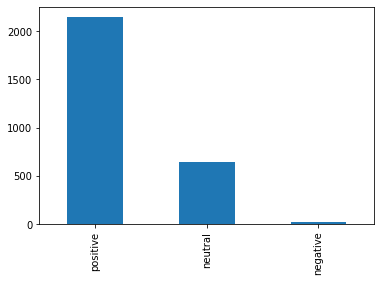

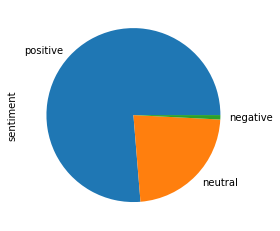

In [6]:
# Visualize the data
import matplotlib.pyplot as plt

# Bar graph
productDF["sentiment"].value_counts().plot(kind="bar")
plt.show()

# Pie graph
productDF["sentiment"].value_counts().plot(kind="pie")
plt.show()


In [7]:
# Examples of reviews along with their sentiment and polarity
print("Positive reviews:")
productDF[productDF["sentiment"] == "positive"].head()

Positive reviews:


,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,This product so far has not disappointed. My c...,Kindle,positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,great for beginner or experienced person. Boug...,very fast,positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,positive


In [8]:
print("Negative reviews:")
productDF[productDF["sentiment"] == "negative"].head()

Negative reviews:


,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
10,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,Not easy for elderly users cease of ads that p...,nice tablet for the price,negative
490,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,1.0,"not good, hate it , never buy it again, sucks....",hate it,negative
556,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,4.0,My only disappointment is the inability to dow...,I like the Kindle Fire very much.,negative
638,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Just lock the card out and let the kids go cra...,Great for kids,negative
644,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I purchased this tablet for my Autistic child....,Nice,negative


In [9]:
# Print some insights
print("Number of positive reviews: " + str(len(productDF[productDF["sentiment"] == "positive"])))
print("Number of negative reviews: " + str(len(productDF[productDF["sentiment"] == "negative"])))
print("Number of neutral reviews: " + str(len(productDF[productDF["sentiment"] == "neutral"])))

print("Average polarity of positive reviews: " + str(productDF[productDF["sentiment"] == "positive"]["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))
print("Average polarity of negative reviews: " + str(productDF[productDF["sentiment"] == "negative"]["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))

print("Average length of positive reviews: " + str(productDF[productDF["sentiment"] == "positive"]["reviews.text"].apply(len).mean()))

print("Average length of negative reviews: " + str(productDF[productDF["sentiment"] == "negative"]["reviews.text"].apply(len).mean()))

Number of positive reviews: 2147
Number of negative reviews: 23
Number of neutral reviews: 644
Average polarity of positive reviews: 0.48993365612616674
Average polarity of negative reviews: -0.42060688405797103
Average length of positive reviews: 142.55659059152305
Average length of negative reviews: 100.0


In [10]:
# Find examples where rating is more than 4 but sentiment is negative
falseNegative = productDF[(productDF["reviews.rating"] > 4) & (productDF["sentiment"] == "negative")]

# Find examples where rating is less than 3 but sentiment is positive
falsePositive = productDF[(productDF["reviews.rating"] < 3) & (productDF["sentiment"] == "positive")]

# reset indicies
falseNegative = falseNegative.reset_index(drop=True)
falsePositive = falsePositive.reset_index(drop=True)


falsePositive.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,2.0,Didn't have some of the features I was looking...,Wasn't for me,positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,1.0,I bought this tablet for my 4 year old daughte...,Ended up returning,positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,2.0,fire tablet is very powerful for the size and ...,great little device,positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,1.0,We bought this earlier on line from another ve...,product works real well.,positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,1.0,Worked great but after awhile I wouldn't unloc...,Won't unlock,positive


In [11]:
falseNegative.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,Just lock the card out and let the kids go cra...,Great for kids,negative
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,I purchased this tablet for my Autistic child....,Nice,negative
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,It does everything my kids need without having...,Perfect for my kids,negative
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,"No complaints. I just wish it played .avi, but...",Awesome,negative
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,5.0,We are a Kindle family! Use them all the time!...,Love Kindle!,negative


In [12]:
# Print some insights
print("Number of false positives: " + str(len(falsePositive)))
print("Number of false negatives: " + str(len(falseNegative)))

print("Average polarity of false positives: " + str(falsePositive["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))
print("Average polarity of false negatives: " + str(falseNegative["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))

print("Average length of false positives: " + str(falsePositive["reviews.text"].apply(len).mean()))
print("Average length of false negatives: " + str(falseNegative["reviews.text"].apply(len).mean()))


Number of false positives: 12
Number of false negatives: 6
Average polarity of false positives: 0.389231436965812
Average polarity of false negatives: -0.5305555555555556
Average length of false positives: 243.16666666666666
Average length of false negatives: 77.0


In [13]:
# Take one example and explain why sentiment analyzer failed
example = falseNegative["reviews.text"][0]
print(example)
print("Sentiment analyzer: " + sentimentAnalyzer(example))
print("Polarity: " + str(textblob.TextBlob(example).sentiment.polarity))

print("""
The reason why the sentiment analyzer failed is because it is not trained to understand sarcasm.
It seems that the user is being sarcastic in this review, but the sentiment analyzer does not understand that.
      """)

Just lock the card out and let the kids go crazy!!
Sentiment analyzer: negative
Polarity: -0.9375

The reason why the sentiment analyzer failed is because it is not trained to understand sarcasm.
It seems that the user is being sarcastic in this review, but the sentiment analyzer does not understand that.
      


In [14]:
# Export to csv
productDF.to_csv("product.csv")